<a href="https://colab.research.google.com/github/AdityakumarSrivastwa/Expension-production-app-mern/blob/main/Ideal_high_pass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2

In [6]:
import numpy as np

In [7]:
from matplotlib import pyplot as plt

In [8]:
image = cv2.imread('/content/Image1.jpeg', 0)  # Load the image in grayscale

**# Step 4: Convert to Frequency Domain**

In [9]:
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

**# Step 5: Create the Ideal High-Pass Filter**

In [10]:
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
D0 = 30  # cutoff frequency
x, y = np.ogrid[:rows, :cols]
mask = np.ones((rows, cols, 2), np.uint8)
r = 30  # radius of the ideal high-pass filter
mask_area = (x - crow) ** 2 + (y - ccol) ** 2 <= r * r
mask[mask_area] = 0

**# Step 6: Apply the Filter**

In [11]:
fshift = dft_shift * mask

**# Step 7: Inverse Transform**

In [12]:
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])


**# Step 8: Display the Results**

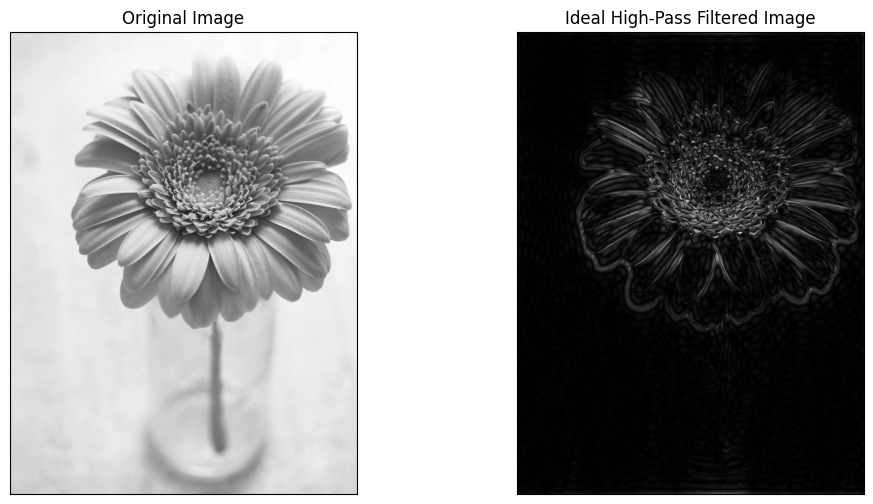

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('Ideal High-Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()